# Marketing Campaign for Banking Products
__by Shubham Anand__

## Introduction
---

<strong>Aim Of the Notebook:</strong>
<ul>
    <li>Uderstand The Problem Statement</li>
    <li>Import and Comprehend the Dataset</li>
    <li>Data Preprocessing and Exploratory Data Analysis</li>
    <li>Training a Logistic Regression Model for Prediction</li>
    <li>Model Evaluation</li>
    <li>Use Various Classification Algorithms and their Evaluation</li>
    <li>Drawing Conclusions</li>
</ul>

### Problem Statement

The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

### Dataset
The project uses the <a target=_blank href="https://www.kaggle.com/itsmesunil/bank-loan-modelling">Bank Loan Modelling</a> Dataset from Kaggle.

The Dataset Comprises of 5000 tuples and 14 attributes.

### Objective
The goal is to predict the likelihood of a liability customer buying personal loans.

The problem statement reduces to binary classification

## Import required libraries and Dataset
---

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the Dataset
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')
# Display first 10 elements
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


## Understanding and Cleaning the dataset
---

In [3]:
print(f'The shape of the dataset is: {df.shape}')
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The shape of the dataset is: (5000, 14)
The dataset has 5000 rows and 14 columns


In [4]:
# Let us see a summary of the dataset
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
# We see that the Experience column has some irregularities with the data
# The minimum value for Experience is -3 which is not a valid entry
# Let us modify the invalid values in Experience column to contain the median for the column
median_experience = df.median().Experience
print(f'The median Experience for the dataset is: {median_experience}')
df.loc[df['Experience'] < 0, 'Experience'] = median_experience

# Let us see the summary of dataframe again
df.describe()

The median Experience for the dataset is: 20.0


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
# Let's print a summary for all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   float64
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [7]:
# We see thaat the dataset is now quite consistant
# There are no null values in the dataset
# Let us verfying that again
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
# We also do not need the ID column as it serves no purpose in determining the target variable
# Thus, we drop the ID coolumn from the dataframe
df.drop('ID', axis=1, inplace=True)
# Head of new dataframe
df.head()

# Let us keep a copy of dataset for EDA plotting
df_copy = df.copy(deep=True)

## Exploratory Data Analysis
---

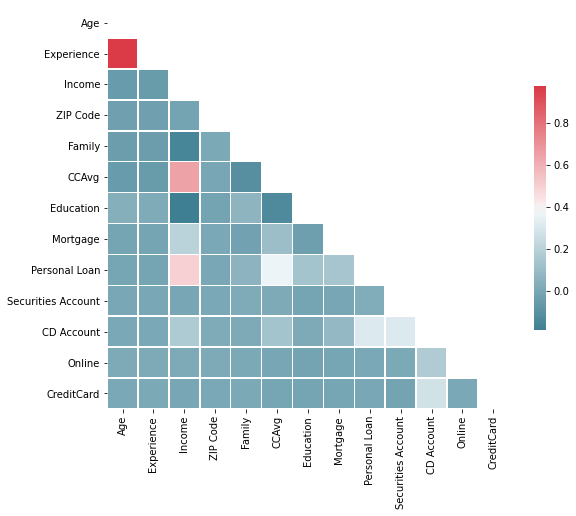

In [9]:
# Let us see the correlation between the attributes

# Computing the correlation matrix
corr = df.corr()

# Generate a mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
# We see that a very high correlation coefficient for Age and Experience which is to be expected
# An older customer is highly likely to be more experienced
# Let us see what the correlation coefficient is
print(f"The correlation coefficient between Age and Experience is: {corr['Experience']['Age']}")

The correlation coefficient between Age and Experience is: 0.9771816883703476


In [11]:
# Let us drop the Experience attribute
# It does not serve any specific purpose in a the model and is highly correlated to Age
df.drop('Experience', axis=1, inplace=True)
# Print head of new Dataframe
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


---

__Number of unique values in each column__

In [12]:
# Now, let's take all catagorical attributes and find the number of unique value each contains
# We do not find total unique values in conotinuous variables as it dosen't serve a purpose
df_categorical = df[['ZIP Code', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]
print(f"Total number of unique ZIP codes: {df_categorical['ZIP Code'].nunique()}")
print(f"Total number of unique Education: {df_categorical['Education'].nunique()}")
print(f"Total number of unique Personal Loan: {df_categorical['Personal Loan'].nunique()}")
print(f"Total number of unique Securities Account: {df_categorical['Securities Account'].nunique()}")
print(f"Total number of unique CD Account: {df_categorical['CD Account'].nunique()}")
print(f"Total number of unique Online: {df_categorical['Online'].nunique()}")
print(f"Total number of unique CreditCard: {df_categorical['CreditCard'].nunique()}")

Total number of unique ZIP codes: 467
Total number of unique Education: 3
Total number of unique Personal Loan: 2
Total number of unique Securities Account: 2
Total number of unique CD Account: 2
Total number of unique Online: 2
Total number of unique CreditCard: 2


We see that apart from ZIP Codes and Education all categorical variables are binary

ZIP Code is a categorical variable with 467 unique values

Education is a categorical variable with 3 unique values specifying Undergraduate, Graduate or Professional

---

### Using Encoders to Encode  non Binary Categorical Variables

__Using One Hot Encoding on Education__

In [13]:
# Let us use one hot encoding to encode the Education attribute as three attributes
eduation_encoded = pd.get_dummies(df_categorical.Education).rename(columns={1: 'Undergraduate', 2: 'Graduate', 3: 'Professional'})
eduation_encoded.head()

,Undergraduate,Graduate,Professional
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [14]:
# Let us concatenate the new Categorcal attributes to the original Dataframe
df = pd.concat([df, eduation_encoded], axis=1)

In [15]:
# Removing Education attribute from the dataframe
df.drop('Education', axis=1, inplace=True)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Undergraduate,Graduate,Professional
0,25,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,45,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,39,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,35,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,35,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


In [16]:
print(f'The shape of the new Dataframe is: {df.shape}')

The shape of the new Dataframe is: (5000, 14)


__Using Target Encoding to Encode ZIP Codes__

<ul>
    <li>We cannot take the same approach with ZIP Code which has a high cardinality</li>
    <li>So, we will use Target Encoding for Zip Code</li>
</ul>

In [17]:
# Importing TargetEncoder
from category_encoders import TargetEncoder

In [18]:
encoder = TargetEncoder()
# We will now encode Zip Code using Personal Loan as our target variable
df['ZIP_encoded'] = encoder.fit_transform(df['ZIP Code'].astype(str), df['Personal Loan'])

# Dropping ZIP Code from the Dataframe
df.drop('ZIP Code', axis=1, inplace=True)

df.head()

,Age,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Undergraduate,Graduate,Professional,ZIP_encoded
0,25,49,4,1.6,0,0,1,0,0,0,1,0,0,0.120000
1,45,34,3,1.5,0,0,1,0,0,0,1,0,0,0.173913
2,39,11,1,1.0,0,0,0,0,0,0,1,0,0,0.112426
3,35,100,1,2.7,0,0,0,0,0,0,0,1,0,0.000004
4,35,45,4,1.0,0,0,0,0,0,1,0,1,0,0.065217


---

### Studying dataset for variable counts

__Number of people with zero mortgage__

In [19]:
print(f"The total number of customers with zero mortgage is: {sum(df['Mortgage'] == 0)}")

The total number of customers with zero mortgage is: 3462


__Number of people with zero credit card spending per month__

In [20]:
print(f"{sum(df['CCAvg']==0)} customers have zero credit card spending per month")

106 customers have zero credit card spending per month


__Value counts for categorical columns__

In [21]:
# Let us count number of Undergraduate, Graduate and Professional customers
print(f"There are a total of {sum(df['Undergraduate']==1)} Undergraduate customers.")
print(f"There are a total of {sum(df['Graduate']==1)} Graduate customers.")
print(f"There are a total of {sum(df['Professional']==1)} Professional customers.")

There are a total of 2096 Undergraduate customers.
There are a total of 1403 Graduate customers.
There are a total of 1501 Professional customers.


In [22]:
# Counting total customers who took a personal loan
print(f"{sum(df['Personal Loan']==1)} customers took a personal loan")

480 customers took a personal loan


In [23]:
# Counting number of customers with credit cards
print(f"{sum(df['CreditCard']==1)} customers have a credit card issued by the bank")

1470 customers have a credit card issued by the bank


In [24]:
# Counting customers with a certificate of deposit account with the bank
print(f"{sum(df['CD Account']==1)} customers have a certificate of deposit account with the bank")

302 customers have a certificate of deposit account with the bank


In [25]:
# Counting customers with a securities account with the bank
print(f"{sum(df['Securities Account']==1)} customers have a securities account with the bank")

522 customers have a securities account with the bank


In [26]:
# Counting customers who use online banking
print(f"There are {sum(df['Online']==1)} customers who use online banking")

There are 2984 customers who use online banking


---

### Analysis of Data

In [27]:
# Let us study the customer demographic by various attributes
# We will use the dataset we saved before for this purpose
df_copy.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<strong>Plotting distribution plots for continuous variables</strong>

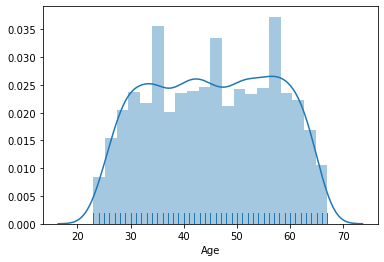

In [28]:
# For age
sns.distplot(df_copy['Age'], bins=20, rug=True)

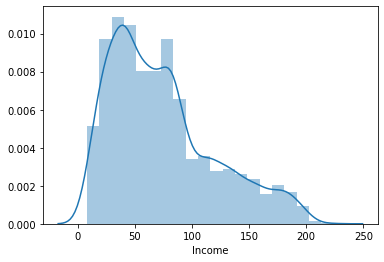

In [29]:
# Let us now plot a distribution for income
sns.distplot(df_copy['Income'], bins=20)

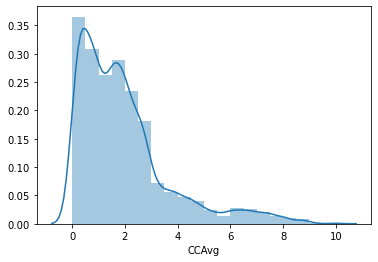

In [30]:
# Let us now plot a distribution for Credit Card spending
sns.distplot(df_copy['CCAvg'], bins=20)

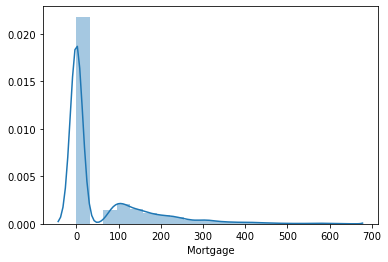

In [31]:
# Let us now plot a distribution for Mortgage
sns.distplot(df_copy['Mortgage'], bins=20)

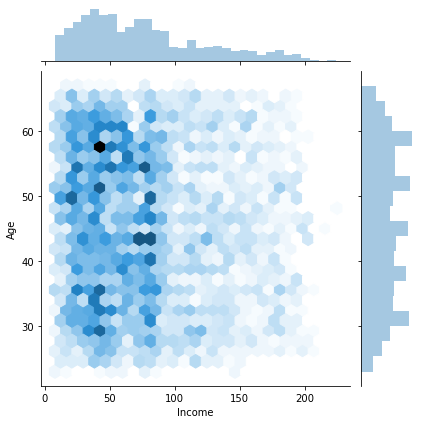

In [32]:
# Let us examine how income varies with age using a hexbin plot
sns.jointplot(x='Income', y='Age', data=df_copy, kind='hex')

__We draw the following conclusions from above graphs__

<ol>
    <li>A majority of the customers lie in the income range of 8k to 100k</li>
    <li>We see that all of our customers are aged between 23 to 67 years old</li>
    <li>There is a uniform distribution of customers in the dataset with respect to age</li>
    <li>A large majoity of Mortgages and Credit Card Spending lie on the lower end</li>
    <li>The hexbin plot shows that income for a majority of customers is below 100k although income increases slightly with age</li>
    <li>We also observe that the dataset contains some attributes which are highly skewed</li>
</ol>

---
__Finding counts of family sizes in dataset__

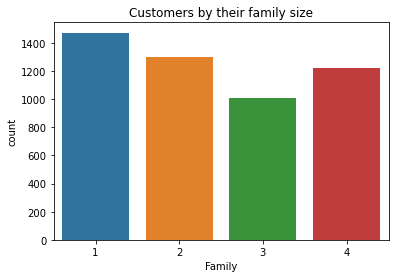

In [33]:
# Let us see the number of customers for each family size
sns.countplot(x='Family', data=df_copy)
plt.title('Customers by their family size')
plt.show()

There is low varience here but we see that most families have a family size of 1 or 2

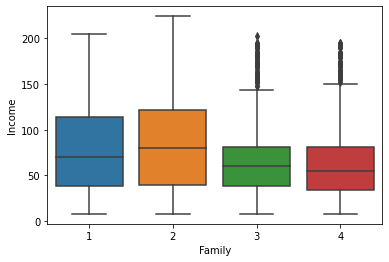

In [34]:
# Let us study the impact of income on family size
sns.boxplot(x='Family', y='Income', data=df_copy)
plt.show()

The median income for families with size 3 or 4 is slightly less than families with size of 1 or 2

Families with a size of 2 are fare flightly better in income than their counterparts

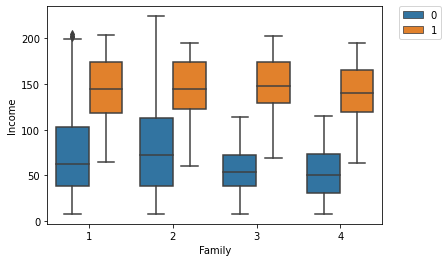

In [35]:
# Let us provide hue to the boxplot on Personal Loan
sns.boxplot(x='Family', y='Income', hue='Personal Loan', data=df_copy)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Customers with family size of 3 or 4 are highly likely to take the loan if their income is in the range 100k to 200k

While it is not same with customers having a family size of 1 or 2 where the box plots almost touch each other

---
__Analysis of customers w.r.t. their education__

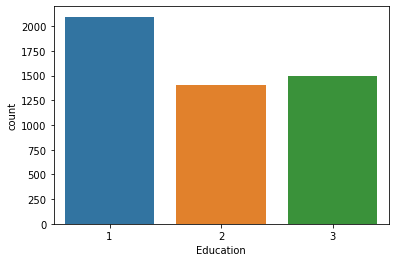

In [36]:
# Let us see the number of customers in each catagory
sns.countplot(x='Education', data=df_copy)

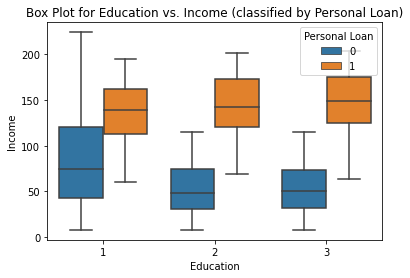

In [37]:
# Let us now see how the income varies with educational qualifications
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data=df_copy)
plt.title('Box Plot for Education vs. Income (classified by Personal Loan)')
plt.show()

In [38]:
# Let us verify the boxplot by grouping by Education
df_copy.groupby('Education').mean()[['Income', 'Personal Loan']]

,Income,Personal Loan
Education,,
1,85.586355,0.044370
2,64.313614,0.129722
3,66.122585,0.136576


__We draw the following conclusions from above graphs__

<ol>
    <li>The dataset contains a larger amount of data for undergraduates</li>
    <li>We see that undergraduates have a more variable income and have a higher mean income than Graduates or Professionals</li>
    <li>We see that the average rate of personal loan for graduates and professionals is quite higher than for undergraduates</li>
    <li>We see that Income has a massive impact on the person taking the loan or not</li>
    <li>The minimum income of customers that took the loan is roughly equal to the median income of customers who did not take the loan</li>
</ol>

---
__Bivariate Analysis__

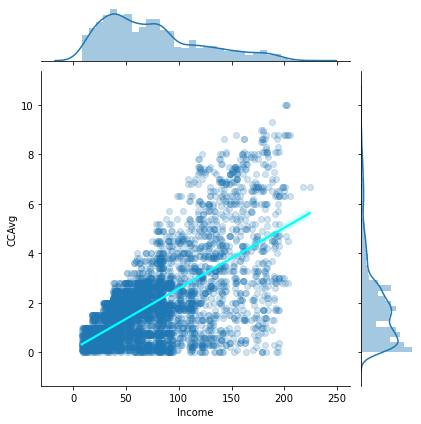

In [39]:
# Plotting a regression plot between Income and Average Credit Card Spending
sns.jointplot(x='Income', y='CCAvg', data=df_copy, kind='reg', joint_kws={'line_kws':{'color':'cyan'}, 'scatter_kws': {'alpha': 0.2}})

As expected, customers with a higher average income have a higher credit card spending

Text(4, 1.0, 'Scatter Plot for Income vs. Mortgage')

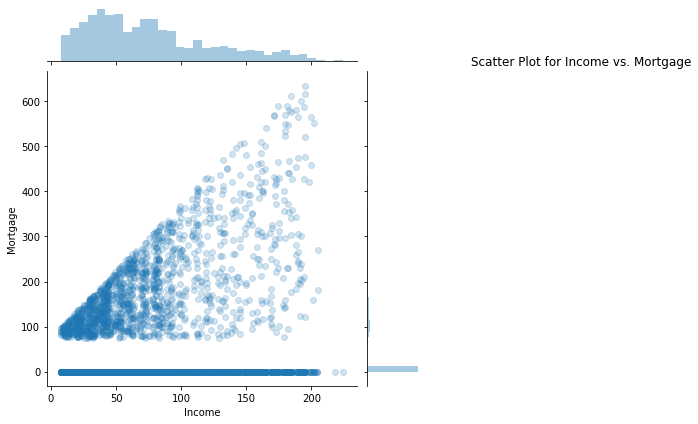

In [40]:
# Plotting a scatter plot between Income and Mortgage
sns.jointplot(x='Income', y='Mortgage', data=df_copy, kind='scatter', alpha=0.2)
plt.title('Scatter Plot for Income vs. Mortgage', x=4)

We see a direct correlation between income and maximum Mortgage

This is mostly due to the fact that banks limit the maximum Mortgage basesd on the customer's income

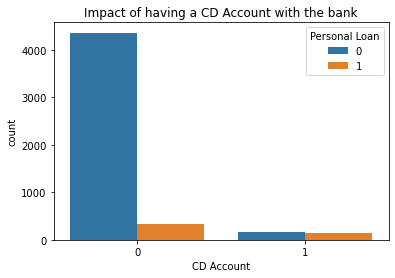

In [41]:
# Let us study the impact having a certificate of deposit has on personal loans
sns.countplot(x='CD Account', data=df_copy, hue='Personal Loan')
plt.title('Impact of having a CD Account with the bank')
plt.show()

We see that almost all customers who have a certificate of deposit account also have taken a personal loan

Let us verify that form the dataset

In [42]:
cd_mask = df_copy['CD Account']==1
pl_mask = df_copy['Personal Loan']==1
print(f"Number of Customers with a CD Account is {sum(cd_mask)}")
print(f"Number of Customers with a CD Account who have taken a personal loan is {sum(cd_mask & pl_mask)}")

Number of Customers with a CD Account is 302
Number of Customers with a CD Account who have taken a personal loan is 140


It turns out that almost half of the customers who had a CD Account have taken the personal loan

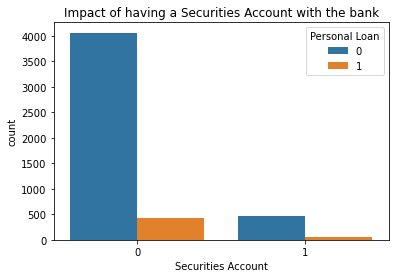

In [43]:
# Let us study the impact having a Securities Account has on personal loans
sns.countplot(x='Securities Account', data=df_copy, hue='Personal Loan')
plt.title('Impact of having a Securities Account with the bank')
plt.show()

We see there is no impact of a Securities Account on Personal Loan

## Applying Transformations to the dataset
---

In [44]:
# We have seen that a lot of variables in the dataset are quite skewed
# Thus we will apply log transforms to the variables to normalize them

# Storing column name to apply log transform on
to_log=['Age', 'Income', 'CCAvg', 'Mortgage']
df_log = df[to_log].applymap(lambda x: np.log(x+1))
df_log.columns = 'log_' + df_log.columns
df_log.head()

,log_Age,log_Income,log_CCAvg,log_Mortgage
0,3.258097,3.912023,0.955511,0.0
1,3.828641,3.555348,0.916291,0.0
2,3.688879,2.484907,0.693147,0.0
3,3.583519,4.615121,1.308333,0.0
4,3.583519,3.828641,0.693147,0.0


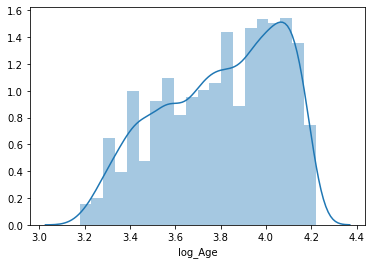

In [45]:
# Plotting the variables after applying log transforms
sns.distplot(df_log['log_Age'], bins=20)

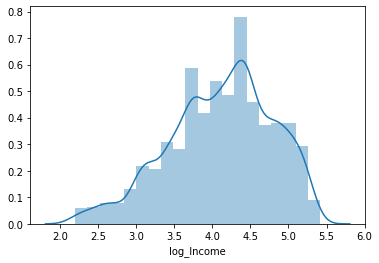

In [46]:
sns.distplot(df_log['log_Income'], bins=20)

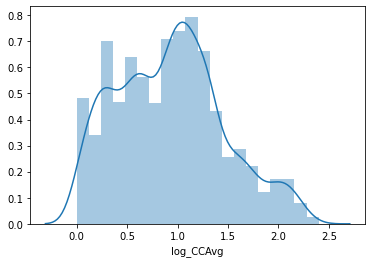

In [47]:
sns.distplot(df_log['log_CCAvg'], bins=20)

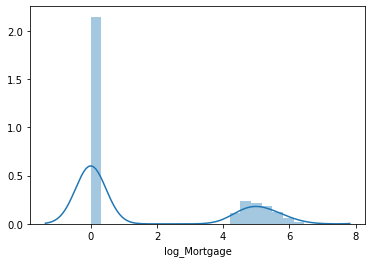

In [48]:
sns.distplot(df_log['log_Mortgage'], bins=20)

The data is more normalized after the transforms

Let us integrate this data with our main dataframe

In [49]:
# Dropping the old variables from the dataframe
df.drop(to_log, axis=1, inplace=True)
# Merging the log transformed data with the main dataframe
df = pd.concat([df, df_log], axis=1)
df.head()

,Family,Personal Loan,Securities Account,CD Account,Online,CreditCard,Undergraduate,Graduate,Professional,ZIP_encoded,log_Age,log_Income,log_CCAvg,log_Mortgage
0,4,0,1,0,0,0,1,0,0,0.120000,3.258097,3.912023,0.955511,0.0
1,3,0,1,0,0,0,1,0,0,0.173913,3.828641,3.555348,0.916291,0.0
2,1,0,0,0,0,0,1,0,0,0.112426,3.688879,2.484907,0.693147,0.0
3,1,0,0,0,0,0,0,1,0,0.000004,3.583519,4.615121,1.308333,0.0
4,4,0,0,0,0,1,0,1,0,0.065217,3.583519,3.828641,0.693147,0.0


## Data Standardization and splitting into train and test set
---

In [50]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

In [51]:
# Splitting the data into training and test set
# Using ratio 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [52]:
# Importing Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
# Fitting standard scaler to X_train and transforming X_train
X_train = scaler.fit_transform(X_train)

In [54]:
# Transforming X_test
X_test = scaler.transform(X_test)

# Logistic Regression Model
---

In [55]:
# Importing Logistic Regression model from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Creating and fitting classifier to Training set
classifier = LogisticRegression(random_state=7)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=7)

In [56]:
# Predicting test set results
y_pred = classifier.predict(X_test)

In [57]:
# Evaluating model performance using confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

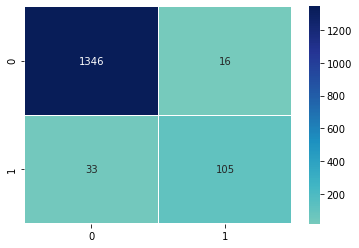

In [58]:
# Plotting the confusion matrix
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", center=250, linewidths=0.1)

We see that our classifier performs quite well with _<b>16 false positives</b>_ and _<b>33 false negatives</b>_.

### Model Evaluation
---

Let us plot the ROC Curve for our regression model to find the area under the ROC curve

In [59]:
# Funciton to plot ROC Curve for provided test set and classifier
def render_roc_curve(X_test, y_test, classifier):
    '''
    Funciton to generate ROC curve for the given classifier
    
    Args:
            X_test (numpy.ndarray): The test set features
            y_test (numpy.array): The ground truth values
            classifier (sklearn classifier): trained sklearn classifier
    
    returns: None
    '''
    
    import sklearn.metrics as metrics
    # calculate the fpr and tpr for all thresholds of the classification
    probs = classifier.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

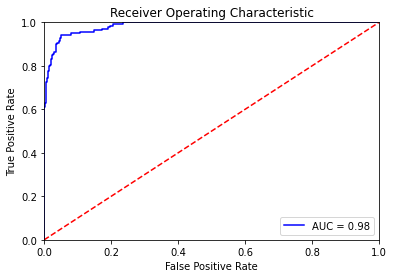

In [60]:
# ROC Curve for Logistic Regression
render_roc_curve(X_test, y_test, classifier)

We see that are model performs quite well with the area under the __ROC Curve__ being 0.98 or __98 percent__.

We can choose an appropriate threshhold for our model based on our business decision.

__Performing Evaluation Metrics__

In [61]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [62]:
print(f"Jaccard index: {jaccard_score(y_test, y_pred):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print(f"LR LogLoss: {log_loss(y_test, classifier.predict_proba(X_test))}")

Jaccard index: 0.68
F1-score: 0.97
LR LogLoss: 0.08450697681908188


We see that the model performs well with various performance metrics

It has a __very high F1 score of <i>0.97</i>__

It has a __very low Log Loss of <i>0.0845</i>__

It has a __jaccard similarity score of <i>0.68</i>__

# K Nearest Neighbour
---

In [63]:
# Importing KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
kNN_model

KNeighborsClassifier(n_neighbors=3)

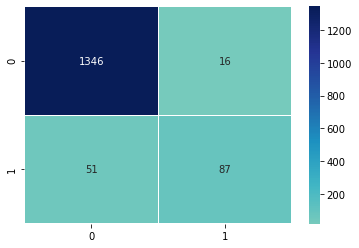

In [64]:
knn_y_pred = kNN_model.predict(X_test)
cm = confusion_matrix(y_test, knn_y_pred)
# Plotting the confusion matrix
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", center=250, linewidths=0.1)

In [65]:
# Iterate from 1 to 10 to find Best k
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

In [66]:
max_accuracy_index = np.where(mean_acc == np.amax(mean_acc))
print('Returned tuple of arrays :', max_accuracy_index)
print('List of Indices of maximum element :', max_accuracy_index[0])

Returned tuple of arrays : (array([4], dtype=int64),)
List of Indices of maximum element : [4]


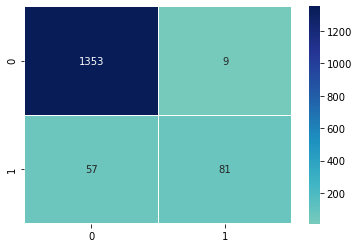

In [67]:
# We see that the model performs best at k = 5
k = 5
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
# Now we find the confusion matrix and evaluate the model
knn_y_pred = kNN_model.predict(X_test)
cm = confusion_matrix(y_test, knn_y_pred)
# Plotting the confusion matrix
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", center=250, linewidths=0.1)

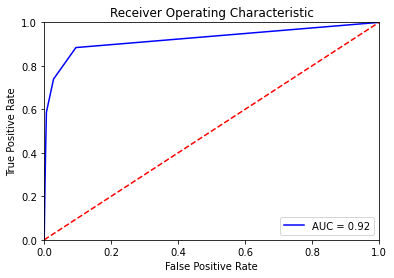

In [68]:
# Let us render the ROC Curve for the model
render_roc_curve(X_test, y_test, kNN_model)

The ROC Curve has an __area under the curve__ of 0.92 or __92 percent__

__Performing Evaluation Metrics__

In [69]:
print(f"Jaccard index: {jaccard_score(y_test, knn_y_pred):.2f}")
print(f"F1-score: {f1_score(y_test, knn_y_pred, average='weighted'):.2f}")

Jaccard index: 0.55
F1-score: 0.95


The KNN model gives a decent prediction

It has a __high F1 score of <i>0.95</i>__

It has a __jaccard similarity score of <i>0.55</i>__

# Naive Bayes
---

In [70]:
# Import Naive Bayes and create model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

# Make predictions
nb_y_pred = nb_model.predict(X_test)

__Performing Evaluation Metrics__

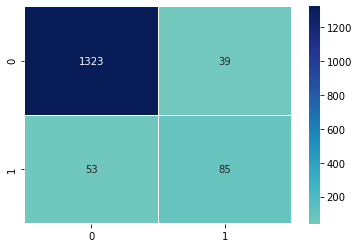

In [71]:
cm = confusion_matrix(y_test, nb_y_pred)
# Plotting the confusion matrix
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", center=250, linewidths=0.1)

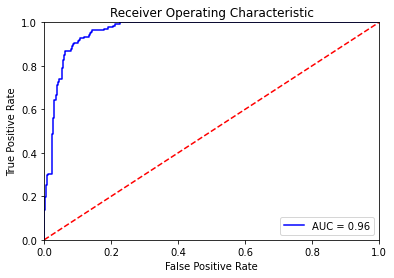

In [72]:
# ROC Curve for Naive Bayes
render_roc_curve(X_test, y_test, nb_model)

Area under the ROC Curve is __96 percent__ 

In [73]:
print(f"Jaccard index: {jaccard_score(y_test, nb_y_pred):.2f}")
print(f"F1-score: {f1_score(y_test, nb_y_pred, average='weighted'):.2f}")

Jaccard index: 0.48
F1-score: 0.94


The KNN model gives a decent prediction

It has a __high F1 score of <i>0.94</i>__

It has a __jaccard similarity score of <i>0.48</i>__

# Decision Tree
---

In [74]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state=7)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=7)

In [75]:
dt_y_pred = DT_model.predict(X_test)

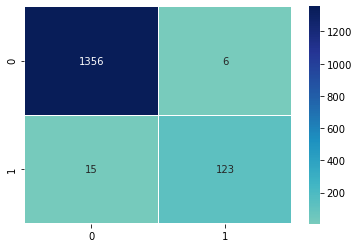

In [76]:
# Finding the confusion matrix
cm = confusion_matrix(y_test, dt_y_pred)
# Plotting the confusion matrix
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", center=250, linewidths=0.1)

__Performing Evaluation Metrics__

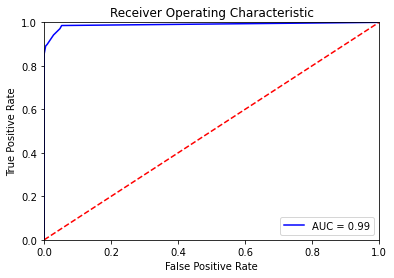

In [77]:
# Render ROC Curve for the model
render_roc_curve(X_test, y_test, DT_model)

The ROC Curve has an __area under the curve__ of 0.99 or __99 percent__

The Decision Tree classifier performs exceptionally well !

In [78]:
print(f"Jaccard index: {jaccard_score(y_test, dt_y_pred):.2f}")
print(f"F1-score: {f1_score(y_test, dt_y_pred, average='weighted'):.2f}")

Jaccard index: 0.85
F1-score: 0.99


The Decision Tree Classfier generalizes to the dataset excetionally well

It has a __almost perfect F1 score of <i>0.99</i>__

It has a __jaccard similarity score of <i>0.85</i>__

_Let us see which features influence the decision making of Decision Tree the most_

[]

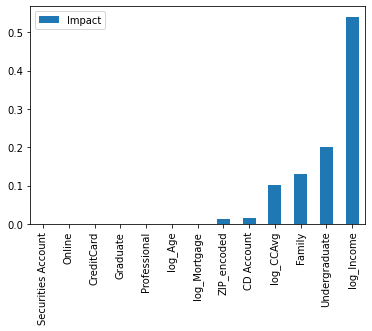

In [79]:
# Plotting feature importance
cols = df.drop('Personal Loan', axis=1).columns
pd.DataFrame({'Impact': DT_model.feature_importances_}, index=cols).sort_values('Impact').plot(kind='bar')
plt.plot()

We see that __income__ dominates the decision making of the Decision Tree Classifier,

Also, features like Being an __undergraduate__, __family size__ and __Average Credit Card spending__ has an impact

---
Tabulating the performance of various models

| Algorithm          | Jaccard | F1-score | LogLoss | Area under ROC |
|--------------------|---------|----------|---------|----------------|
| KNN                | 0.55    | 0.95     | NA      |      0.92      |
| Decision Tree      | 0.85    | 0.99     | NA      |      0.99      |
| Naive Bayes        | 0.48    | 0.94     | NA      |      0.96      |
| Logistic Regression| 0.68    | 0.97     | 0.0845  |      0.98      |

__<i>The Decision Tree classifier comes out as the undisputed champion</i>__

# Conclusion
---

We have achieved the objectives that were desired by the notebook.

We imported the dataset and analysed it for any redundent and spurious attributes which were pruned form the dataset.

We examined the features of the dataset and came to a conclusion that the variables could be classified as:

<ol>
    <li>Categorical Variables</li>
    <ul>
        <li>Binary Categorical</li>
        <li>Multi class Categorical</li>
    </ul>
    <li>Countinuous Variables</li>
    <ul>
        <li>Uniformly Distributed</li>
        <li>Skewed</li>
    </ul>
</ol>

We kept the binary class variables as they were, used one hot encoder for low cardinality attributes and used Target Encoder for high cardinality variables like Pin Code.

We applied log transform to all continuous variables.

We then carried out univariate and bivariate analysis on the attributes.

We removed our target variable and split the dataset into training and test sets in a 70:30 ratio respectively.

We then standardized the train and test features

Finally, we used various machine learning models to predict the test set.

The models used were:

<ul>
    <li><i>Logistic Regression</i></li>
    <li><i>K Nearest Neighbor</i></li>
    <li><i>Decision Tree</i></li>
    <li><i>Naive Bayes</i></li>
<ul>

We also evaluated the models based on evaluation metrics like __Jaccard Index__ and __F1 scores__.
    
ROC Curves for the models were also plotted and area under the curve evaluated.
    
The various mertrics for the models were tabulated.

We have drawn a lot of conclusions from the dataset and should be able to target advertising to a desired demographic.

The decision tree classifier is very well generalized to our overall dataset and is able to give a _<b>98.6</b>_ percent __test__ accuracy with an __f1 score__ of _<b>0.99</b>_

It is a very reliable classifier and will help us target our advertisement and resources on select audience

We also have to see the hints that pop up time and again in our analysis. We have seen that high income groups are more likely to take a personal loan.

The bank can also focus on microfinancing schemes for middle and low income demographic to bring them into the mix.